# Robust Digit Recognition (ECE4950 2018 Spring)

This is the data description file for the inclass competition for ECE4950(2018 Spring): Robust Digit Recognition. For details about the competition, please see the kaggle website https://www.kaggle.com/c/robust-digit-recognition/

In this competition, you will use the machine learning algorithms we learned in class to classify images of digits. You will be given images of hand-writen digits. Each image is 28 by 28 pixels in size. And give each image, your goal is to give which digit is written (From 0 to 9).

The images we are using are based on MNIST dataset http://yann.lecun.com/exdb/mnist/. Please check this website for details.

You can use the following script to load data.

In [17]:
from scipy.io import loadmat
import numpy as np
data_path = "./data.mat"
data_raw = loadmat(data_path)

train_img = data_raw["train_img"]
test_img = data_raw["test_img"]
train_lbl = data_raw["train_lbl"]

Data will be an array of 70000 784-length numpy arrays. 50000 of them will be the training data and 20000 of them will be the testing data. The corresponding labels of training data are also privided. 

Each vector represents an image of size $28 \times 28$. The original black and white images were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. 

You can reshape each vector to be an $28 \times 28$ matrix and plot the image using the following script. Typical images will look like the following:

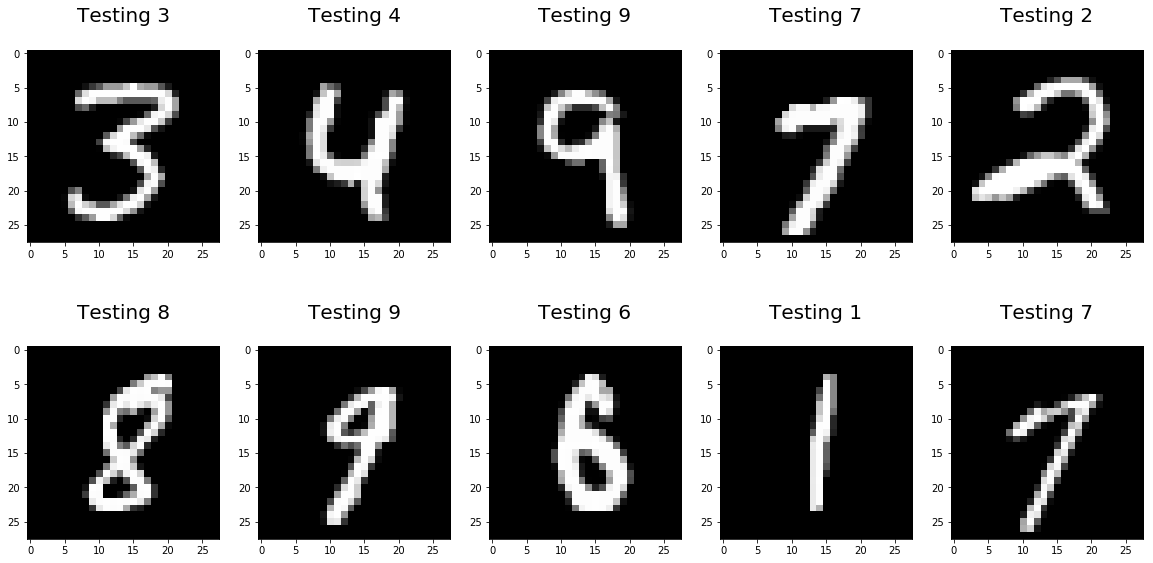

In [24]:
#plot out the training data, including the imagine and label
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train_img[10:20], train_lbl[10:20])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)

In practice, when we apply our model to new data. The data we get may be corrupted. In this challenge, we are trying to consider the following two possible patterns of corruption.

Pattern 1.There may be stains on you camera lens when you collect new data. 

In this case, we will generate a square of size $10\times 10$ uniformly at random on the central $20 \times 20$ region. And at each pixel inside the square, it is set to be white (grey level 255) with probability $1/2$ and black (grey level 0) with probability $1/2$.

Pattern 2.There may also be noise on the image due to bad illuminance.

In this case, at each pixel inside the central $20 \times 20$ region, we will add an independent random Gaussian noise with mean 0 and standard deviation 100.

Typical images from the test set look like the following:

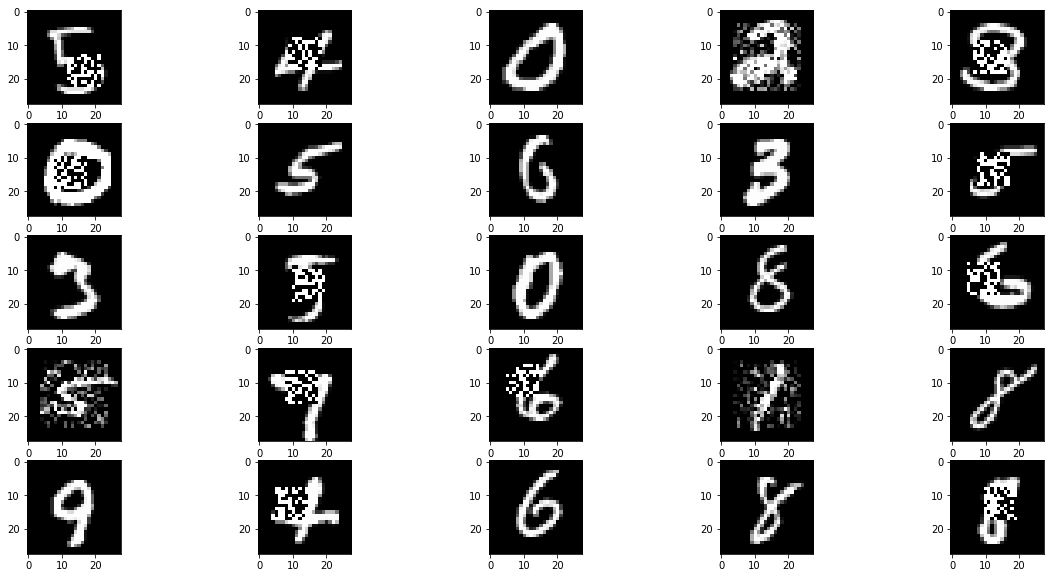

In [25]:
#plot out the testing data. There are three kinds of testing data.We can see what they look like here.
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for index, image in enumerate(test_img[25:50]):
    plt.subplot(5, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

The training images are clean(uncorrupted) while the noisy images may be corrupted. In the test set, approximately 40% of the data is clean. 40% of them are corrupted by Pattern 1 and the rest are corrupted by Pattern 2. By trying to deal with these noise patterns, you will increase your testing score significantly. Now start to design your own robust classifier!